In [1]:
import pandas as pd


In [2]:
from nsepy import get_history as gh
import datetime as dt

In [6]:
stk_data

Price,Close,High,Low,Open,Volume
Ticker,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS,TATACONSUM.NS
Date,,,,,
2021-06-01,640.528442,641.923417,631.870052,640.528442,2355484
2021-06-02,647.984253,649.138717,635.092908,640.239816,3021421
2021-06-03,654.189453,657.075583,647.695661,650.341280,2485855
2021-06-04,660.875671,663.761801,649.379242,655.007172,2398771
2021-06-07,673.382141,680.164534,661.212271,663.809800,3511853
...,...,...,...,...,...
2021-12-29,703.070312,705.247300,696.636081,704.376482,783940
2021-12-30,704.376465,713.906810,701.764068,705.344015,2230935


C:\Users\User\AppData\Local\Temp\ipykernel_13944\2066877838.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stk_data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price              Close          High           Low          Open  \
Ticker     TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS   
Date                                                                 
2021-06-01    640.528442    641.923417    631.870052    640.528442   
2021-06-02    647.984253    649.138717    635.092908    640.239816   
2021-06-03    654.189453    657.075583    647.695661    650.341280   
2021-06-04    660.875671    663.761801    649.379242    655.007172   
2021-06-07    673.382141    680.164534    661.212271    663.809800   

Price             Volume  
Ticker     TATACONSUM.NS  
Date                      
2021-06-01       2355484  
2021-06-02       3021421  
2021-06-03       2485855  
2021-06-04       2398771  
2021-06-07       3511853  


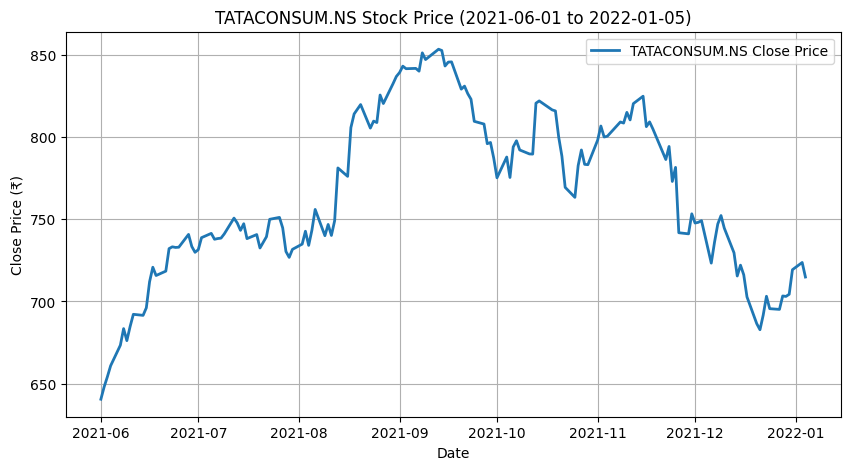

In [5]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

start = dt.datetime(2021,6,1)
end   = dt.datetime(2022,1,5)

# use the correct ticker for Tata Consumer
ticker = "TATACONSUM.NS"

stk_data = yf.download(ticker, start=start, end=end)

print(stk_data.head())

plt.figure(figsize=(10,5))
plt.plot(stk_data.index, stk_data["Close"], label=f"{ticker} Close Price", linewidth=2)
plt.title(f"{ticker} Stock Price ({start.date()} to {end.date()})")
plt.xlabel("Date")
plt.ylabel("Close Price (₹)")
plt.legend()
plt.grid(True)
plt.show()


In [7]:

column="Close"

In [8]:
column

'Close'

In [9]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (150, 1)


In [10]:
len(data1)

150

In [11]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

120
X_train length: (120, 1)
X_test length: (30, 1)
y_train length: (120, 1)
y_test length: (30, 1)


In [12]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.37921298989707053
maPe-Testset: 1.0963543910447116
************
Lag=1,Trend=t
RMSE-Testset: 0.36259717023598437
maPe-Testset: 1.0493701934612192
************
Lag=1,Trend=c
RMSE-Testset: 0.36076891771449515
maPe-Testset: 1.0443289976052377
************
Lag=1,Trend=ct
RMSE-Testset: 0.4008167210268731
maPe-Testset: 1.1583674053793847
************
Lag=2,Trend=n
RMSE-Testset: 0.37925192178182354
maPe-Testset: 1.0964559337009032
************
Lag=2,Trend=t
RMSE-Testset: 0.35955831937896454
maPe-Testset: 1.0407360117980338
************
Lag=2,Trend=c
RMSE-Testset: 0.361462168684345
maPe-Testset: 1.0462204824311716
************
Lag=2,Trend=ct
RMSE-Testset: 0.39504570715830445
maPe-Testset: 1.1418780453125523
************
Lag=3,Trend=n
RMSE-Testset: 0.371078353136784
maPe-Testset: 1.0728356672461041
************
Lag=3,Trend=t
RMSE-Testset: 0.3743907359793276
maPe-Testset: 1.082180095242253
************
Lag=3,Trend=c
RMSE-Testset: 0.3588604051326827
maPe-Testset: 1.03

C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

In [ ]:
Lag=4,Trend=c
RMSE-Testset: 0.35239768060665283
maPe-Testset: 1.0195895442825595

In [13]:
i=4
td='c'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=4,Trend=c
RMSE-Testset: 0.35239768060665283
maPe-Testset: 1.0195895442825595
************


C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


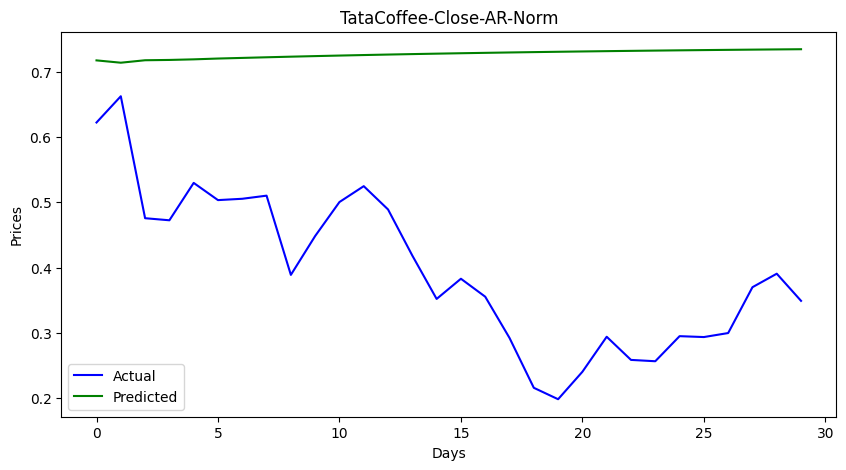

In [14]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [15]:
len(data1)

150

In [16]:
y_test

array([[0.622199  ],
       [0.66241016],
       [0.47566791],
       [0.472487  ],
       [0.52973632],
       [0.50338356],
       [0.50542831],
       [0.51019911],
       [0.38888462],
       [0.44840627],
       [0.50043079],
       [0.5247388 ],
       [0.48907144],
       [0.41841801],
       [0.35208167],
       [0.38297823],
       [0.35548959],
       [0.29233301],
       [0.21600048],
       [0.19850745],
       [0.24053579],
       [0.29415019],
       [0.2587104 ],
       [0.25666565],
       [0.29505935],
       [0.29369618],
       [0.29982986],
       [0.37002871],
       [0.39070237],
       [0.34912833]])

In [17]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [18]:
aTestNormTable

,Close
0,0.622199
1,0.66241
2,0.475668
3,0.472487
4,0.529736
5,0.503384
6,0.505428
7,0.510199
8,0.388885
9,0.448406


In [19]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [20]:
actual_stock_price_test_ori

array([[773.02416992],
       [781.58703613],
       [741.82073975],
       [741.14337158],
       [753.33447266],
       [747.72271729],
       [748.15814209],
       [749.17407227],
       [723.3404541 ],
       [736.01544189],
       [747.09393311],
       [752.27026367],
       [744.67498779],
       [729.6295166 ],
       [715.50335693],
       [722.08270264],
       [716.22906494],
       [702.7800293 ],
       [686.52520752],
       [682.80010986],
       [691.74993896],
       [703.16699219],
       [695.62017822],
       [695.18475342],
       [703.3605957 ],
       [703.0703125 ],
       [704.37646484],
       [719.32513428],
       [723.72753906],
       [714.87445068]])

In [21]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [22]:
actual_stock_price_test_oriA

,Close
0,773.02417
1,781.587036
2,741.82074
3,741.143372
4,753.334473
5,747.722717
6,748.158142
7,749.174072
8,723.340454
9,736.015442


In [23]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [24]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

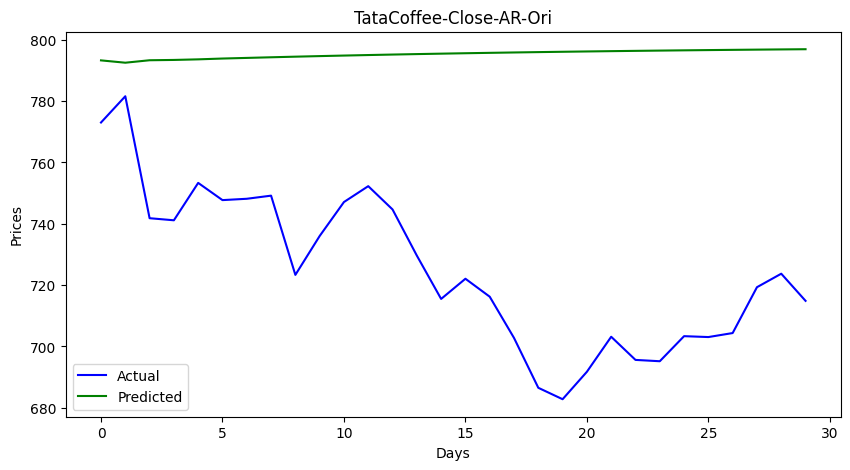

In [25]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [26]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 75.04220853236882
maPe-Testset: 0.09834251644494404


C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
forecast=model_fit.predict(len(data1), len(data1)+3)



In [28]:
forecast

array([0.73470524, 0.73497908, 0.73523882, 0.73548518])

In [29]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [30]:

forecast_stock_price_test_oriF

,Closefore
0,796.982094
1,797.040408
2,797.095718
3,797.14818
